In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
import warnings
warnings.filterwarnings("ignore")


# View

In [2]:
WT=pd.read_csv("D:\\DATA ANALYST\\Python project\\Walmart.csv")

In [3]:
WT.head

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle   

In [47]:
WT.tail

<bound method NDFrame.tail of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle   

In [5]:
WT.shape

(1000, 17)

In [6]:
WT.size

17000

In [7]:
WT.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
WT.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Extracting day from date

In [9]:
WT["day"]= pd.to_datetime(WT["Date"]).dt.day

In [10]:
WT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Correcting Value

In [11]:
WT['gross margin percentage']=WT['gross income']/WT['Total']*100
WT['gross margin percentage'].head()

0    4.761905
1    4.761905
2    4.761905
3    4.761905
4    4.761905
Name: gross margin percentage, dtype: float64

# Finding Null Values

In [12]:
WT.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
day                        0
dtype: int64

In [13]:
WT[WT.isnull().any(axis=1)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day


# Unique Values

In [14]:
WT.day.unique()

array([ 5,  8,  3, 27, 25, 24, 10, 20,  6,  9, 12,  7, 29, 15, 11,  1, 21,
       17,  2, 22, 28, 23,  4, 16, 19, 14, 13, 26, 18, 30, 31])

# Statistical Describing

In [15]:
WT.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,8.210573e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000


# Categorical Describing

In [16]:
WT.describe(include="object").T

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2019-02-07,20
Time,1000,506,19:48:00,7
Payment,1000,3,Ewallet,345


In [17]:
WT[WT.duplicated(keep="first")]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day


# Data Seperation (Numerical)

In [18]:
num_data= pd.DataFrame({})
for i in WT.columns:
    if WT[i].dtypes!="object":
        num_data[i]=WT[i]

# Correlation in numerical dataset

In [19]:
num_data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.009757,0.633962,-0.008778,0.057021
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.061887,0.705510,-0.015815,-0.043347
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,-0.047491,1.000000,-0.036442,-0.002515
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.047491,1.000000,-0.036442,-0.002515
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,-0.047491,1.000000,-0.036442,-0.002515
gross margin percentage,0.009757,-0.061887,-0.047491,-0.047491,-0.047491,1.000000,-0.048890,0.022969,0.081058
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.048890,1.000000,-0.036442,-0.002515
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,0.022969,-0.036442,1.000000,-0.007076
day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,0.081058,-0.002515,-0.007076,1.000000


In [20]:
num_data.isna().sum()

Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
day                        0
dtype: int64

In [21]:
num_data.nunique()

Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
cogs                       990
gross margin percentage      3
gross income               990
Rating                      61
day                         31
dtype: int64

In [22]:
WT["gross margin percentage"].unique()

array([4.76190476, 4.76190476, 4.76190476])

# Visualization for outlier check

In [23]:
#1 Boxplot

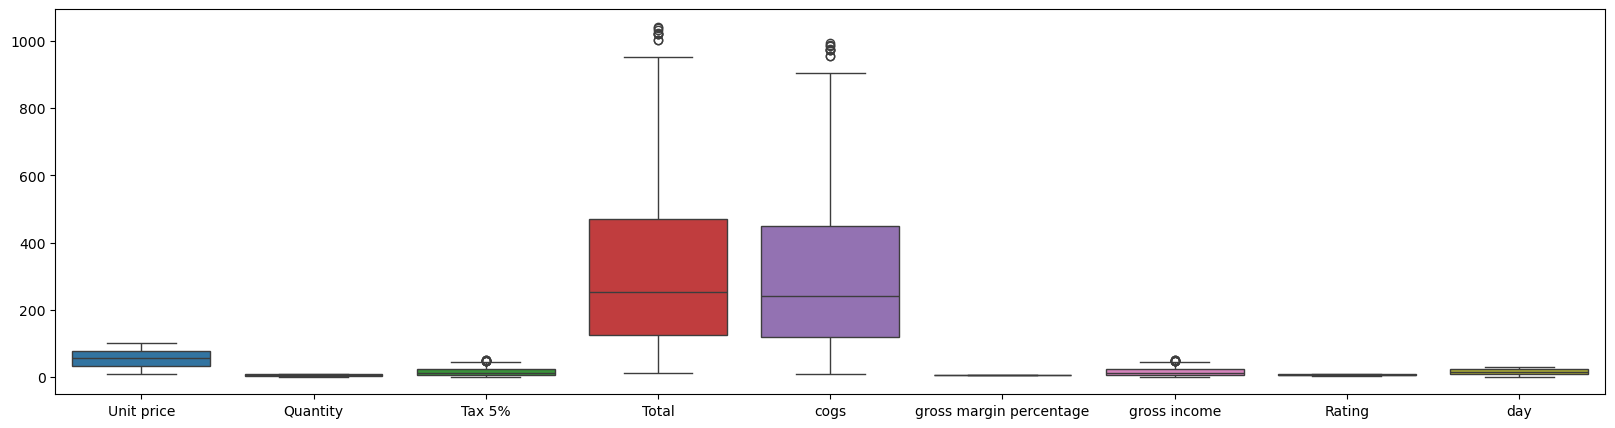

In [24]:
plt.figure(figsize=(20,5)) # to change chart dimensions
sns.boxplot(num_data)
plt.show() #to remove heading from the chart

<Axes: >

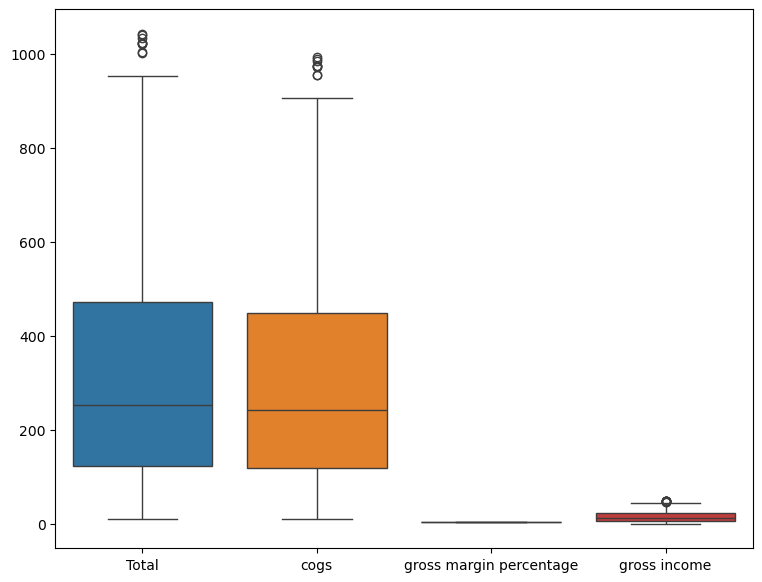

In [25]:
plt.figure(figsize=(9,7))
sns.boxplot(WT[["Total", "Payment", "cogs","gross margin percentage", "gross income"]])

# Distribution

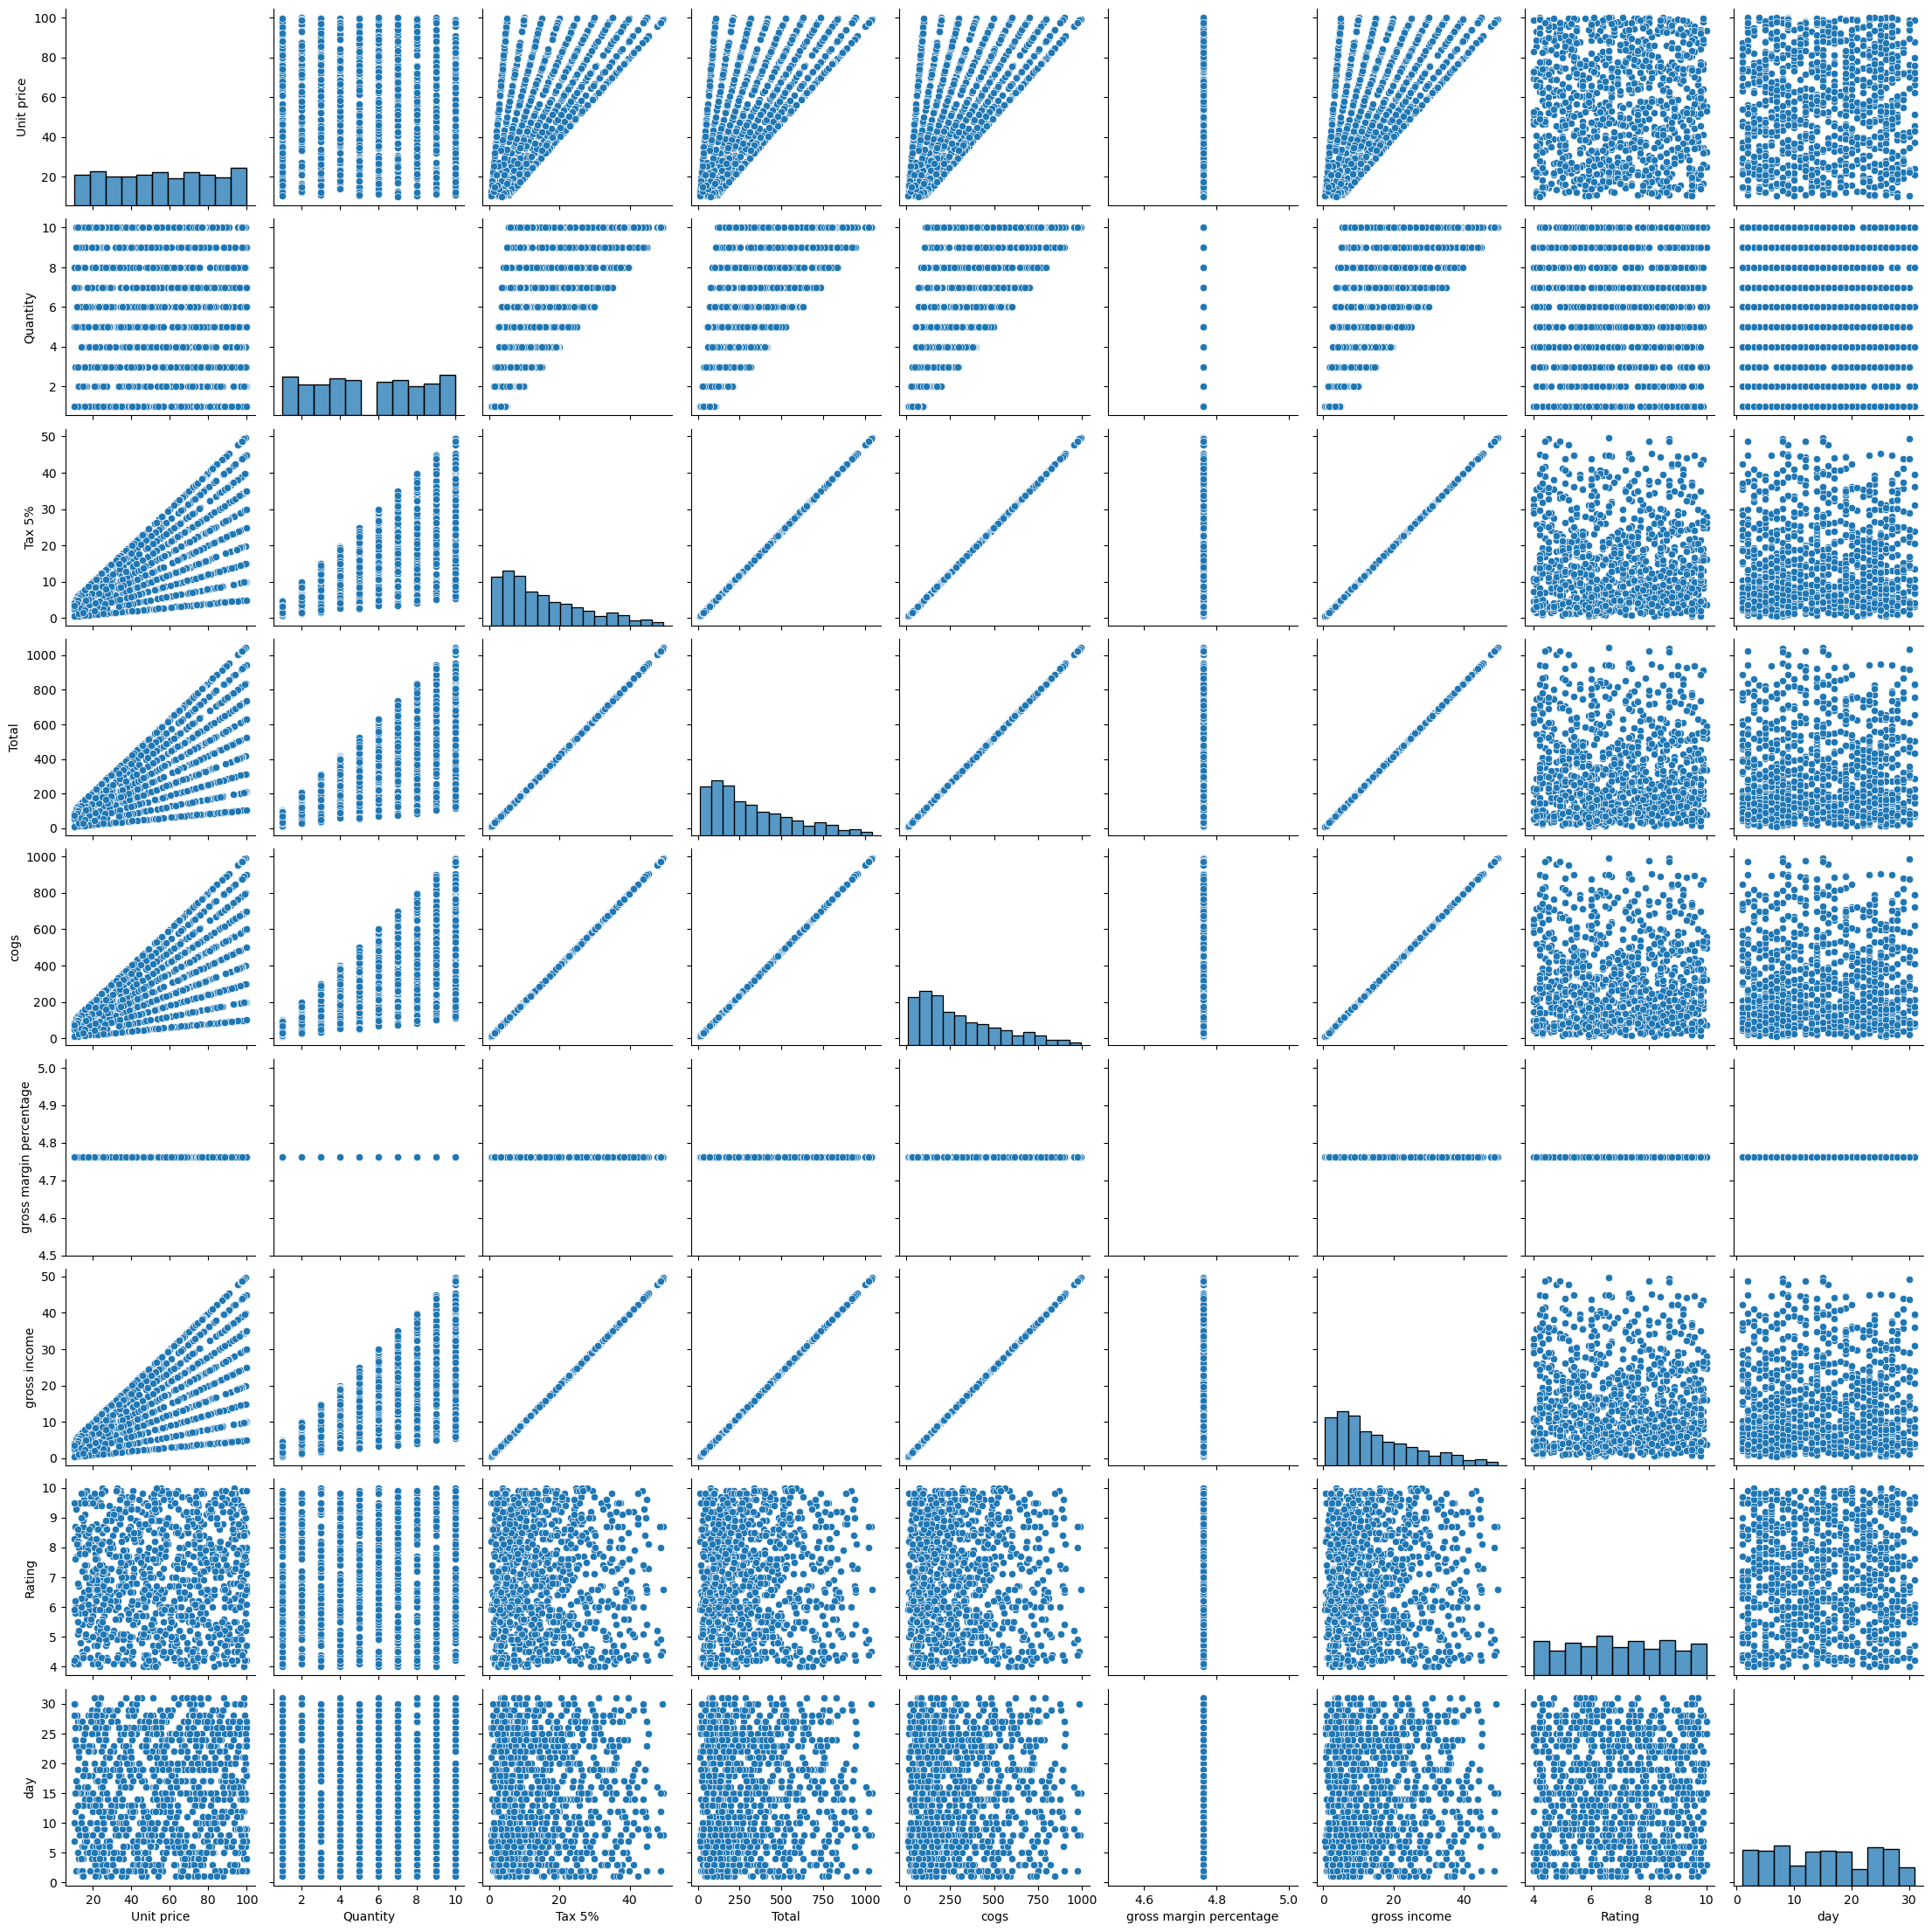

In [26]:
sns.pairplot(num_data)

# Extracting Quantiles

In [27]:
Q1=[num_data[i].quantile(0.25)for i in num_data.columns]
Q3=[num_data[i].quantile(0.75)for i in num_data.columns]

In [28]:
Q1

[32.875,
 3.0,
 5.924875,
 124.422375,
 118.4975,
 4.761904761904762,
 5.924875,
 5.5,
 8.0]

# Numerical data columns extraction

In [29]:
col=[i for i in num_data.columns]

In [30]:
col

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating',
 'day']

# Data Seperation (Categorical)

In [31]:
cat_data = pd.DataFrame({})

for i in WT.columns:
    if WT[i].dtypes =="object":
        cat_data[i]=WT[i]

In [32]:
cat_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,2019-01-05,13:08:00,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,2019-03-08,10:29:00,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,2019-03-03,13:23:00,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,2019-01-27,20:33:00,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2019-02-08,10:37:00,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,2019-01-29,13:46:00,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,2019-03-02,17:16:00,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2019-02-09,13:22:00,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2019-02-22,15:33:00,Cash


# Dataframe of columns and quantile values

In [33]:
box=pd.DataFrame({"columns":col,"25% quantile":Q1,"75% quantile":Q3})
box

,columns,25% quantile,75% quantile
0,Unit price,32.875000,77.935000
1,Quantity,3.000000,8.000000
2,Tax 5%,5.924875,22.445250
3,Total,124.422375,471.350250
4,cogs,118.497500,448.905000
5,gross margin percentage,4.761905,4.761905
6,gross income,5.924875,22.445250
7,Rating,5.500000,8.500000
8,day,8.000000,23.000000


# Upper and Lower fence and IQR extraction

In [34]:
box["IQR"]= box["75% quantile"]-box["25% quantile"]
box

,columns,25% quantile,75% quantile,IQR
0,Unit price,32.875000,77.935000,4.506000e+01
1,Quantity,3.000000,8.000000,5.000000e+00
2,Tax 5%,5.924875,22.445250,1.652038e+01
3,Total,124.422375,471.350250,3.469279e+02
4,cogs,118.497500,448.905000,3.304075e+02
5,gross margin percentage,4.761905,4.761905,8.881784e-16
6,gross income,5.924875,22.445250,1.652038e+01
7,Rating,5.500000,8.500000,3.000000e+00
8,day,8.000000,23.000000,1.500000e+01


In [35]:
box['upper fence']=box['75% quantile']+1.5*box['IQR']
box['lower fence']=box['25% quantile']-1.5*box['IQR']
box

,columns,25% quantile,75% quantile,IQR,upper fence,lower fence
0,Unit price,32.875000,77.935000,4.506000e+01,145.525000,-34.715000
1,Quantity,3.000000,8.000000,5.000000e+00,15.500000,-4.500000
2,Tax 5%,5.924875,22.445250,1.652038e+01,47.225813,-18.855688
3,Total,124.422375,471.350250,3.469279e+02,991.742062,-395.969438
4,cogs,118.497500,448.905000,3.304075e+02,944.516250,-377.113750
5,gross margin percentage,4.761905,4.761905,8.881784e-16,4.761905,4.761905
6,gross income,5.924875,22.445250,1.652038e+01,47.225813,-18.855688
7,Rating,5.500000,8.500000,3.000000e+00,13.000000,1.000000
8,day,8.000000,23.000000,1.500000e+01,45.500000,-14.500000


# Checked correlation in numerical dataset and Visualization

<Axes: >

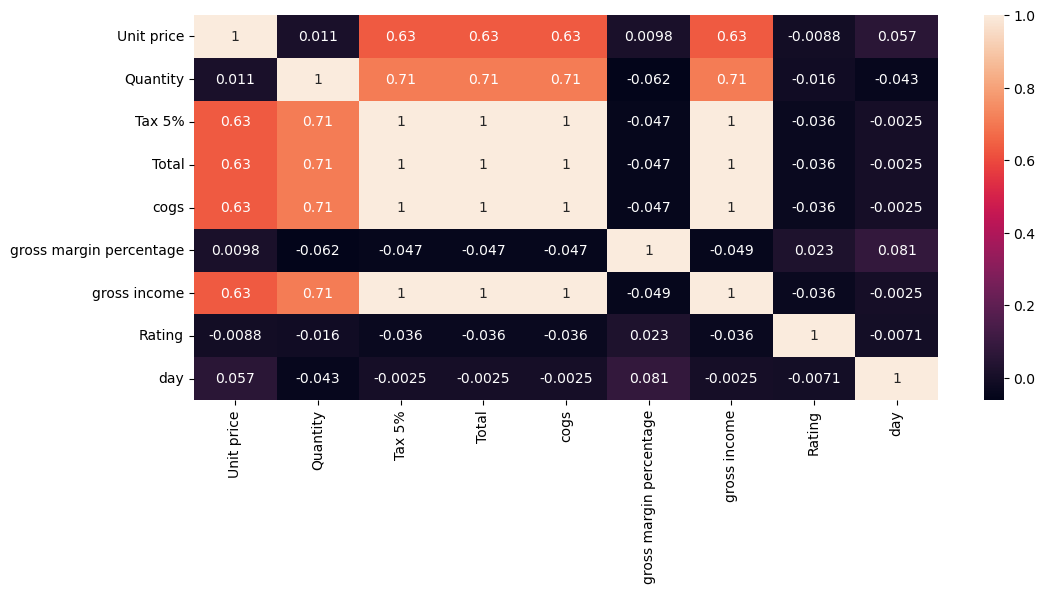

In [36]:
plt.figure(figsize=(12,5))
sns.heatmap(num_data.corr(),annot=True)

In [37]:
WT.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day'],
      dtype='object')

<Axes: >

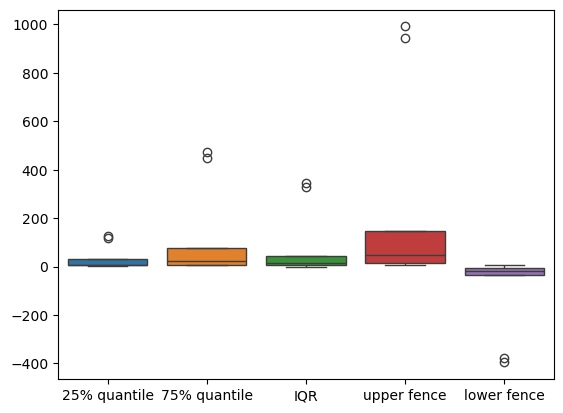

In [38]:
sns.boxplot(box)

In [39]:
WT.shape

(1000, 18)

# Outliers Removal With The Help Of IQR Method

In [40]:
df=WT.copy()
for i in df.columns:

    if df[i].dtypes != 'object':
        Q1=WT[i].quantile(0.25)
        Q3=WT[i].quantile(0.75)
        IQR=Q3-Q1
        lower_fence=Q1-1.5*IQR
        upper_fence=Q3+1.5*IQR
        df=df[(df[i]>=lower_fence) & (df[i]<=upper_fence)]

In [41]:
WT.shape

(1000, 18)

In [42]:
df.shape

(991, 18)

In [43]:
df.shape[0]/WT.shape[0]

0.991

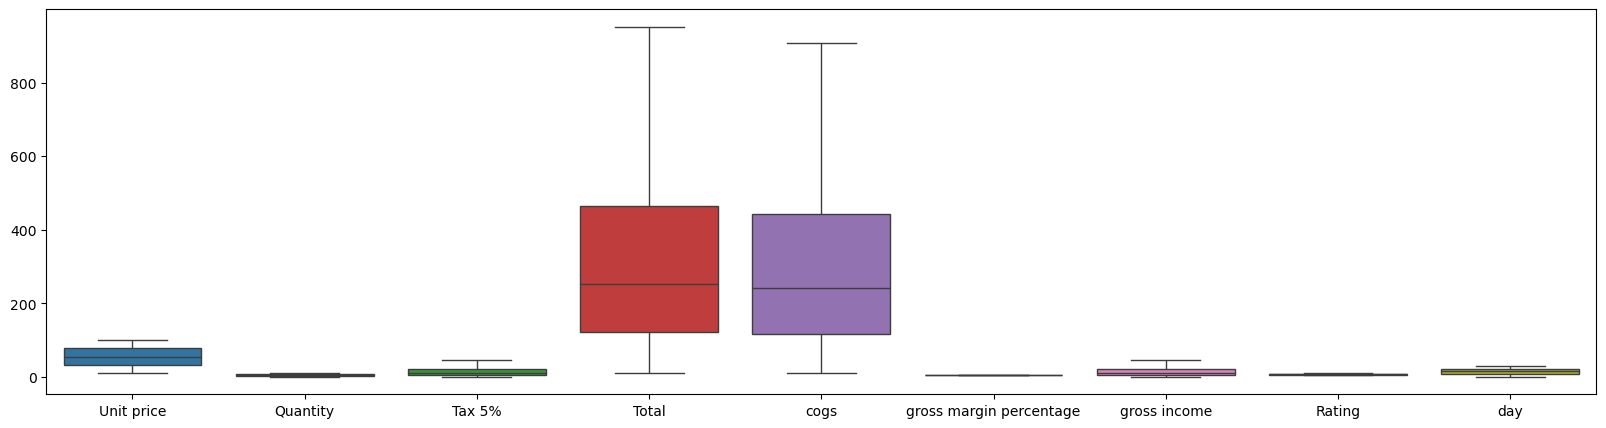

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(df)
plt.show()

# Sum of Sales by Branch

In [45]:
df["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

In [48]:
branch=df.groupby('Branch').agg({'Total':'sum'})
branch

,Total
Branch,
A,105161.0805
B,104152.7970
C,104441.4315


In [ ]:
df.columns

# Average Quantity by Customer Type

In [ ]:
cs_type=df1.groupby('Customer type').agg({'Quantity':'mean'})
cs_type

In [ ]:
cs_type_max=df1.groupby('Customer type').agg({'Quantity':'mean'})
cs_type_max

# Total Sales by City

In [ ]:
city=df1.groupby('City').agg({'Total':'sum'})
city

In [ ]:
sns.barplot(x=df1.City,y=df1.Total)
plt.show()

# Product vs Quantity

In [ ]:
pro=df.groupby("Product line").agg({"Quantity":"sum"})
pro

In [ ]:
pro.mean()

In [ ]:
pro.describe().T

# Sum of all products

In [ ]:
df["Product line"].value_counts()

In [ ]:
df["Customer type"].value_counts()

# Visualization of total amount by invoice

In [ ]:
plt.hist(df["Total"],bins=10)
plt.title("Distribution of Total Invoice Amount")
plt.xlabel("Total")
plt.ylabel("Frequency")
plt.show()

# Total Invoice Amount By Customer Type

In [ ]:
df.groupby("Customer type").agg({"Total":"sum"})

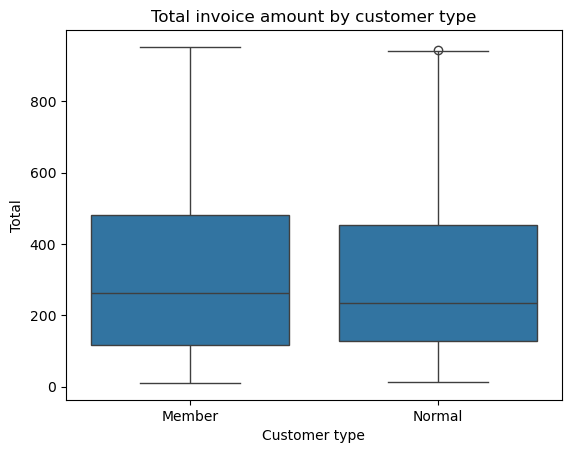

In [50]:
sns.boxplot(x='Customer type', y='Total' ,data=df)
plt.title('Total invoice amount by customer type')
plt.show()

# Count of Invoice by Product

In [51]:
df["Product line"].value_counts()

Product line
Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        156
Health and beauty         152
Name: count, dtype: int64

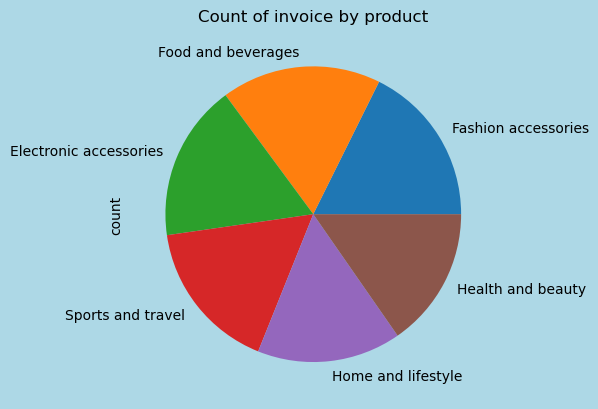

In [52]:
df['Product line'].value_counts().plot(kind='pie')
plt.title('Count of invoice by product')
plt.gcf().patch.set_facecolor('lightblue')
plt.show()

# Product line and Unit price groupby according to quantity

In [53]:
df.groupby('Product line').agg({'Unit price':'sum','Quantity':'sum'})

,Unit price,Quantity
Product line,,
Electronic accessories,9103.77,971
Fashion accessories,9877.86,872
Food and beverages,9647.02,942
Health and beauty,8337.88,854
Home and lifestyle,8462.88,871
Sports and travel,9365.44,910


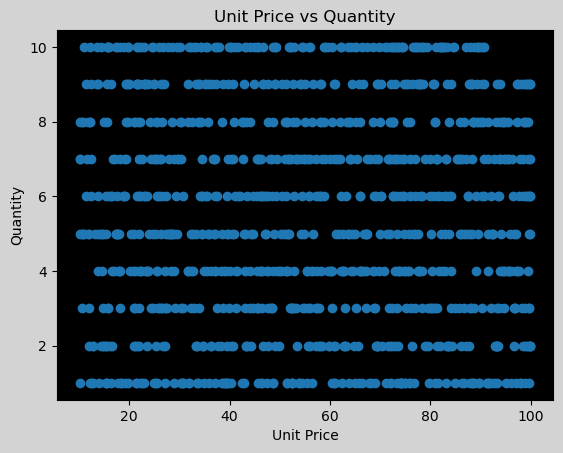

In [54]:
plt.scatter(df['Unit price'],df['Quantity'])
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.gcf().patch.set_facecolor('lightgrey')  # Change figure background color
plt.gca().set_facecolor('black') #change axis colour
plt.show()

# Gender vs Sales

             Total
Gender            
Female  161738.115
Male    152017.194


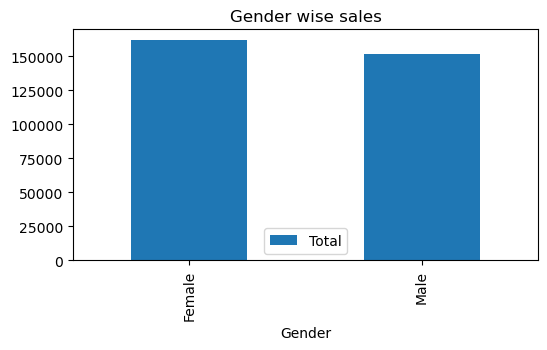

In [55]:
gen_sum=df.groupby('Gender').agg({'Total':'sum'})
gen_sum.plot(kind='bar',figsize=(6,3),title='Gender wise sales')
print(gen_sum)
plt.show()

# Gender vs Total Invoice

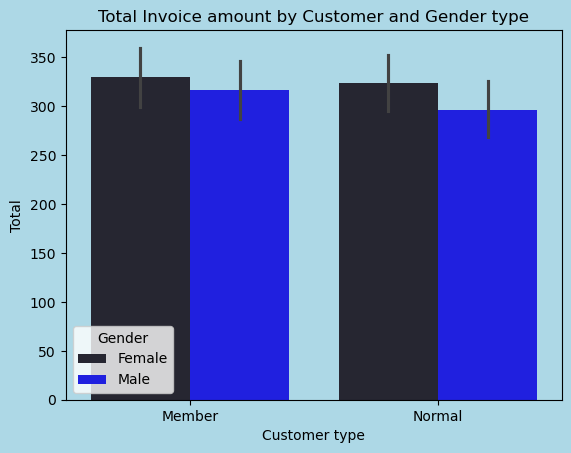

In [56]:
sns.barplot(x='Customer type',y='Total',hue='Gender',color='blue',data=df)
plt.gcf().patch.set_facecolor('lightblue')
plt.gca().set_facecolor('lightblue')
plt.title('Total Invoice amount by Customer and Gender type')
plt.show()

# Total Invoice Amount by Date

In [57]:
td=df.groupby('Date').agg({'Total':'sum','Invoice ID':'count'})
td

,Total,Invoice ID
Date,,
2019-01-01,4745.1810,12
2019-01-02,1945.5030,8
2019-01-03,2078.1285,8
2019-01-04,1623.6885,6
2019-01-05,3536.6835,12
...,...,...
2019-03-26,1962.5130,13
2019-03-27,2902.8195,10
2019-03-28,2229.4020,10


# Total invoice by Invoice Id

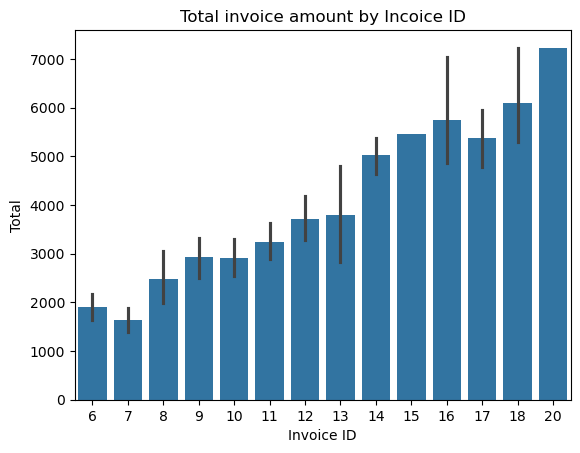

In [58]:
sns.barplot(y='Total',x='Invoice ID',data=td)
plt.title("Total invoice amount by Incoice ID")
plt.show()

# Top 5 Product lines according to Amount

In [59]:
top_5_prod=df.groupby('Product line').agg({'Total':'sum'}).sum().nlargest(5)
top_5_prod

Total    313755.309
dtype: float64

In [60]:
top_5_prod=df.groupby('Product line')['Total'].sum().nlargest(5)
prod_df=pd.DataFrame(top_5_prod)
prod_df

,Total
Product line,
Food and beverages,55110.3840
Electronic accessories,54337.5315
Sports and travel,54120.7065
Fashion accessories,51203.2500
Home and lifestyle,49789.6980


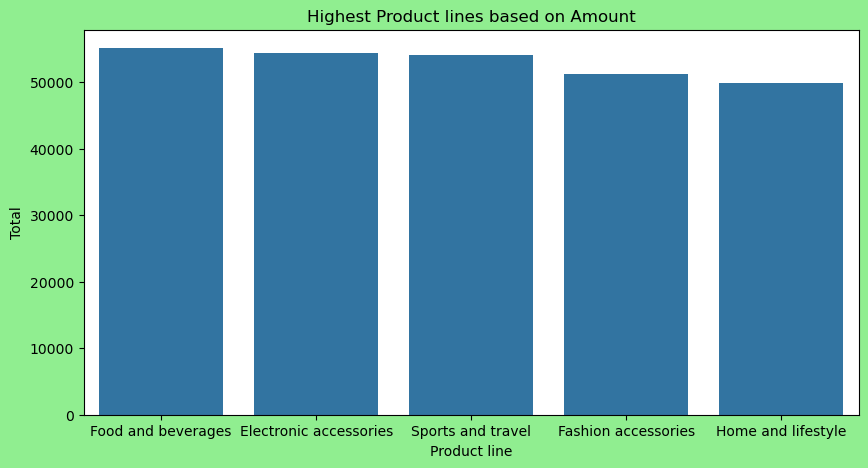

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(data=prod_df, y='Total', x=prod_df.index)
plt.gcf().patch.set_facecolor('lightgreen')
plt.title('Highest Product lines based on Amount')
plt.show()

# Branch vs Sales

In [63]:
top_branch=df.groupby('Branch')['Total'].sum().nlargest()
top_branch

Branch
A    105161.0805
C    104441.4315
B    104152.7970
Name: Total, dtype: float64

In [64]:
topb_df=pd.DataFrame(top_branch)
topb_df_=topb_df.reset_index()
topb_df_

,Branch,Total
0,A,105161.0805
1,C,104441.4315
2,B,104152.7970


Branch
A    105161.0805
B    104152.7970
C    104441.4315
Name: Total, dtype: float64


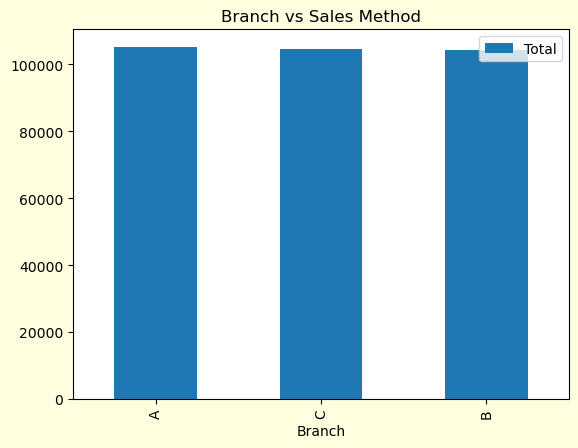

In [65]:
sales_branch=topb_df_.groupby('Branch')['Total'].sum()
print(sales_branch)
topb_df_.plot(kind='bar',x='Branch',y='Total',title='Branch vs Sales Method')
plt.gcf().patch.set_facecolor('lightyellow')
plt.show()

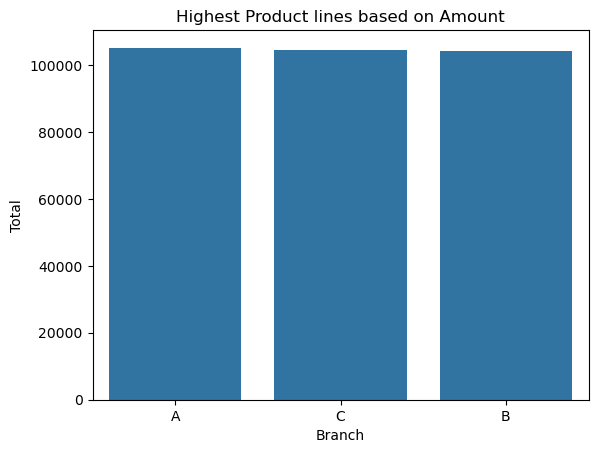

In [66]:
sns.barplot(data=topb_df_, y='Total', x='Branch')
plt.title('Highest Product lines based on Amount')
plt.show()

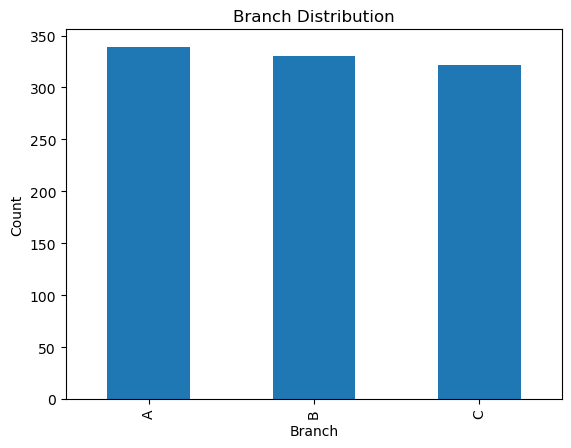

In [68]:
df['Branch'].value_counts().plot(kind='bar')
plt.title('Branch Distribution')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.show()

# Count of Payment by Branch

In [69]:
df.groupby('Branch').agg({'Payment':'count'})

,Payment
Branch,
A,339
B,330
C,322


In [70]:
df.groupby('Payment').agg({'Branch':'count'})

,Branch
Payment,
Cash,342
Credit card,307
Ewallet,342


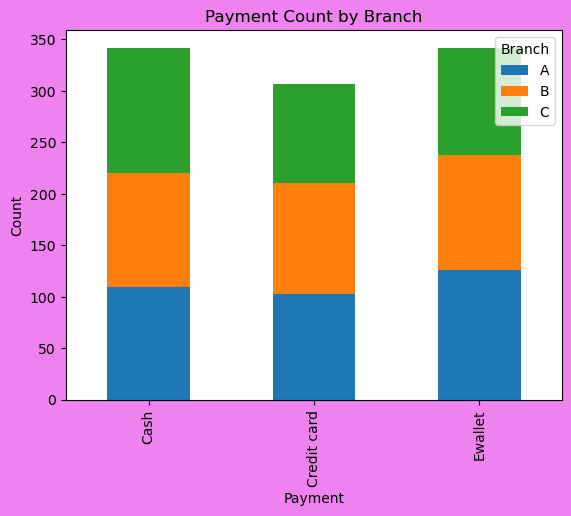

In [72]:
pd.crosstab(df['Payment'],df['Branch']).plot(kind='bar',stacked=True)
plt.title('Payment Count by Branch')
plt.gcf().patch.set_facecolor('violet')
plt.gca().set_facecolor('white')
plt.xlabel('Payment')
plt.ylabel('Count')
plt.show()

# Branch vs Sales

Payment
Cash           110200.860
Credit card     96642.042
Ewallet        106912.407
Name: Total, dtype: float64


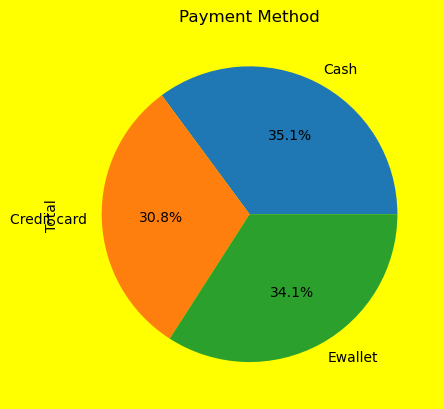

In [73]:
pay_method=df.groupby('Payment')['Total'].sum()
print(pay_method)
pay_method.plot(kind='pie',autopct='%1.1f%%',title='Payment Method')
plt.gcf().patch.set_facecolor('yellow')
plt.show()

# Quantity And Total Sales Maximum

In [75]:
df.groupby('Quantity')['Total'].max()

Quantity
1     104.6745
2     209.7690
3     314.0550
4     417.5640
5     523.8450
6     629.4960
7     734.7060
8     836.3040
9     944.6220
10    951.8250
Name: Total, dtype: float64

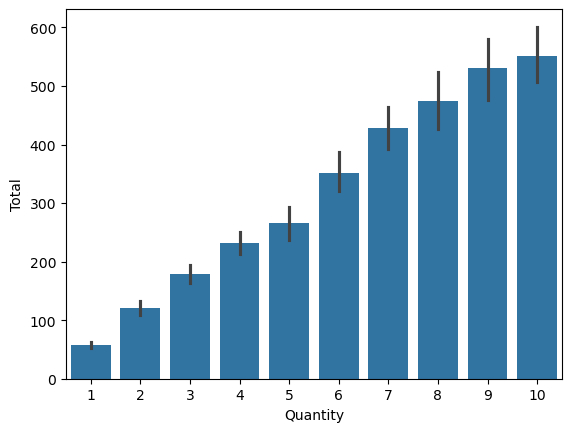

In [77]:
sns.barplot(x='Quantity',y='Total',data=df)
plt.show()

# Product vs COGS vs Gross Income vs Total sales

In [78]:
df.groupby('Product line').agg({'cogs':'sum','gross income':'sum','Total':'sum'})

,cogs,gross income,Total
Product line,,,
Electronic accessories,51750.03,2587.5015,54337.5315
Fashion accessories,48765.00,2438.2500,51203.2500
Food and beverages,52486.08,2624.3040,55110.3840
Health and beauty,46851.18,2342.5590,49193.7390
Home and lifestyle,47418.76,2370.9380,49789.6980
Sports and travel,51543.53,2577.1765,54120.7065


# Average Product vs Customer Type


Average Product purchase by Customer Type:
Customer type
Member    323.545440
Normal    309.593671
Name: Total, dtype: float64


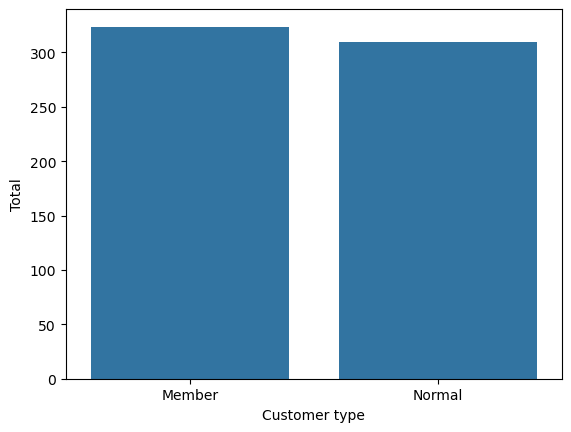

In [79]:
avg_prod=df.groupby('Customer type')['Total'].mean()
print("\nAverage Product purchase by Customer Type:")
print(avg_prod)
avg_prod_df=pd.DataFrame(avg_prod)
sns.barplot(x=avg_prod_df.index,y='Total',data=avg_prod_df)
plt.show()

# Product bought acc. to Gender

In [81]:
prod_gen=df.groupby(['Gender','Product line'])['Quantity'].sum()
pd.DataFrame(prod_gen)

Quantity
Gender Product line                    
Female Electronic accessories       488
       Fashion accessories          510
       Food and beverages           504
       Health and beauty            343
       Home and lifestyle           478
       Sports and travel            486
Male   Electronic accessories       483
       Fashion accessories          362
       Food and beverages           438
       Health and beauty            511
       Home and lifestyle           393
       Sports and travel            424

# Average Rating by Branch

In [82]:
avg_rating_by_branch = df.groupby('Branch')['Rating'].mean()
print("\nAverage Rating by Branch:")
pd.DataFrame(avg_rating_by_branch)


Average Rating by Branch:


,Rating
Branch,
A,7.022124
B,6.831212
C,7.087267


In [83]:
sales_by_branch = df.groupby(['Branch', 'Product line'])['Total'].sum()
f=pd.DataFrame(sales_by_branch)
sales_by_branches=f.reset_index()
sales_by_branches

,Branch,Product line,Total
0,A,Electronic accessories,18317.1135
1,A,Fashion accessories,15293.2185
2,A,Food and beverages,17163.1005
3,A,Health and beauty,12597.7530
4,A,Home and lifestyle,22417.1955
5,A,Sports and travel,19372.6995
6,B,Electronic accessories,17051.4435
7,B,Fashion accessories,16413.3165
8,B,Food and beverages,15214.8885
9,B,Health and beauty,19980.6600


<Axes: >

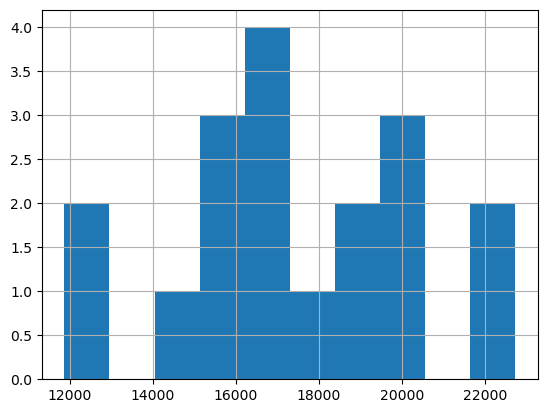

In [84]:
sales_by_branches['Total'].hist(bins=10)

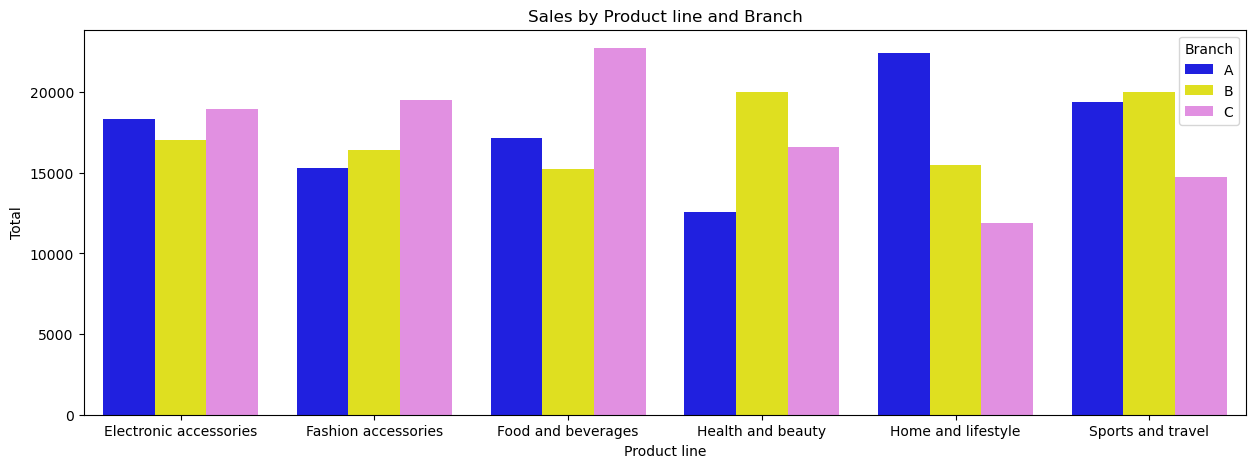

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(x='Product line', y='Total', data=sales_by_branches, palette=['blue', 'yellow', 'violet'],hue='Branch')
plt.title("Sales by Product line and Branch")
plt.show()    

# Average of Total

In [87]:
df["Total"].mean()

316.60475176589307

In [88]:
# Monthly sales

In [89]:
df['Date']=pd.to_datetime(df['Date'])
monthly_sales=df.groupby(df['Date'].dt.to_period('M'))['Total'].sum()
pd.DataFrame(monthly_sales)

,Total
Date,
2019-01,111205.563
2019-02,94116.729
2019-03,108433.017


In [90]:
monthly_sales

Date
2019-01    111205.563
2019-02     94116.729
2019-03    108433.017
Freq: M, Name: Total, dtype: float64

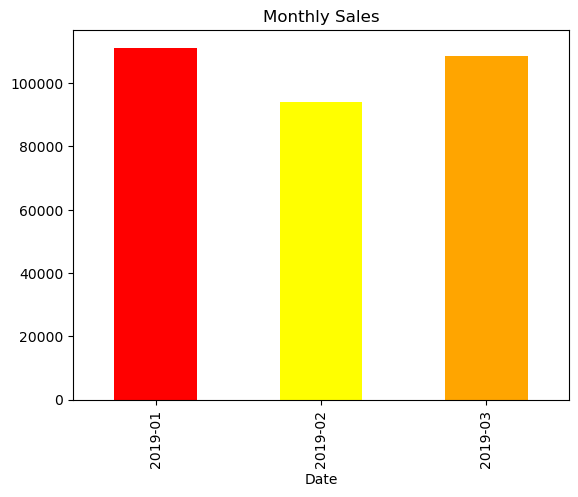

In [91]:
monthly_sales.plot(kind='bar',title='Monthly Sales',color=['red','yellow','orange'])
plt.show()

# Correlation between unit price and Total

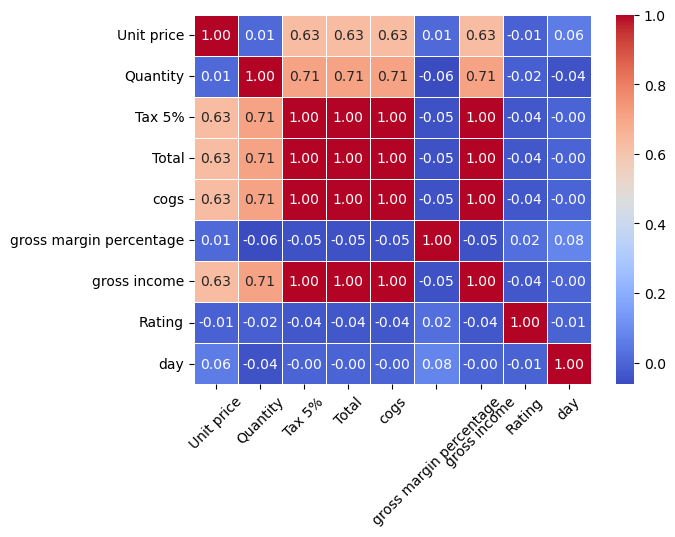

In [93]:
sns.heatmap(num_data.corr(),annot=True,fmt='.2f', cmap='coolwarm',cbar=True, linewidths=0.5, annot_kws={"size": 10})
plt.xticks(rotation=45)
plt.show()

In [94]:
df[['Unit price','Total']].corr()

,Unit price,Total
Unit price,1.000000,0.623355
Total,0.623355,1.000000


# ROI

In [114]:
total_sales=WT['Total'].sum()
total_cogs=WT['cogs'].sum()
gross_income=total_sales-total_cogs
avg_gross_margin=WT['gross margin percentage'].mean()

print("TOTAL SALES:",total_sales)
print("TOTAL COGS:",total_cogs)
print("AVERAGE GROSS MARGIN PERCENTAGE:",avg_gross_margin)

TOTAL SALES: 322966.749
TOTAL COGS: 307587.38
AVERAGE GROSS MARGIN PERCENTAGE: 4.761904761904762


# DEFINING GOOD AND BAD SALES w.r.t AVG GROSS MARGIN PERCENTAGE

In [115]:
good_sales=WT[WT['gross margin percentage']>avg_gross_margin]
bad_sales=WT[WT['gross margin percentage']<=avg_gross_margin]

In [116]:
good_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,25
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8,25
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38:00,Ewallet,735.60,4.761905,36.7800,8.0,24
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27:00,Credit card,164.52,4.761905,8.2260,5.9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,2019-01-03,19:08:00,Credit card,496.00,4.761905,24.8000,6.2,3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,2019-01-28,15:46:00,Credit card,602.96,4.761905,30.1480,8.4,28
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06:00,Credit card,282.80,4.761905,14.1400,4.5,22
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,29


In [117]:
bad_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15:00,Credit card,72.52,4.761905,3.6260,7.2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22,18:35:00,Ewallet,174.90,4.761905,8.7450,6.6,22
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40:00,Ewallet,60.95,4.761905,3.0475,5.9,18
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,9


In [118]:
good_sales['Invoice ID'].count()

423

In [119]:
bad_sales['Invoice ID'].count()

577

Text(0.5, 1.0, 'GOOD SALES: PRODUCT VS GROSS INCOME')

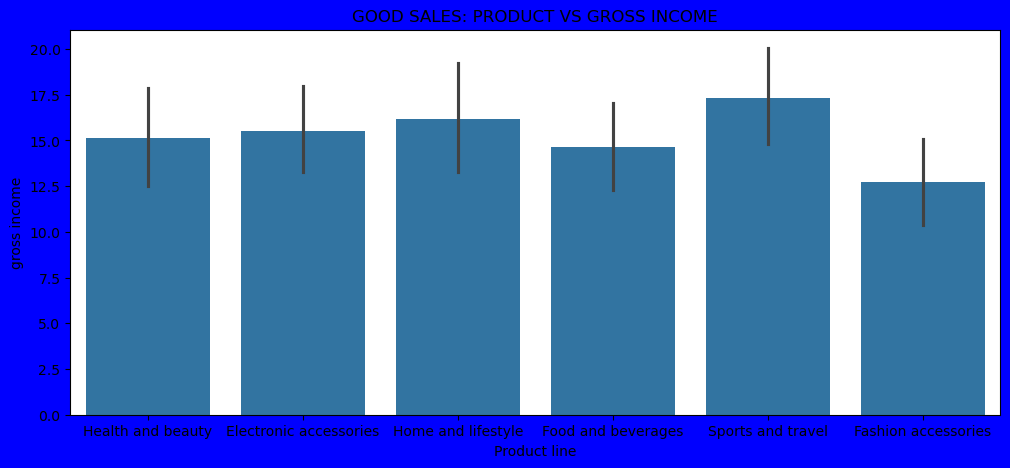

In [120]:
plt.figure(figsize=(12,5))
sns.barplot(x='Product line',y='gross income',data=good_sales)
plt.gcf().patch.set_facecolor('blue')
plt.gca().set_facecolor('white')

plt.title('GOOD SALES: PRODUCT VS GROSS INCOME')

Text(0.5, 1.0, 'BAD SALES: PRODUCT VS GROSS INCOME')

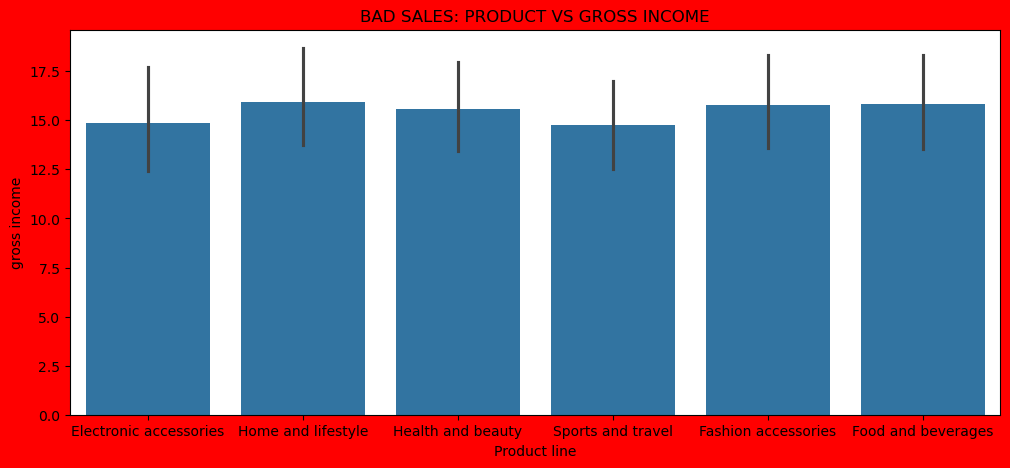

In [121]:
plt.figure(figsize=(12,5))
sns.barplot(x='Product line',y='gross income',data=bad_sales)
plt.gcf().patch.set_facecolor('red')
plt.gca().set_facecolor('white')
plt.title('BAD SALES: PRODUCT VS GROSS INCOME')

In [122]:
WT.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8


# INSIGHTS
BY BRANCH : BRANCH A had the highest Sales, i.e: 105161.0805

BY CITY : Naypyitaw produced the highest Sales: 104441.4315

BY CUSTOMER TYPE : "Member" made more sales 323.545440 than " Normal" : 309.59367, not much difference noticed

BY GENDER : FEMALES MADE MORE SALES THAN MALES

PRODUCT LINE: THE TOP 3 MOST SELLING PRODUCTS WERE : Food and beverages: 55110.3840, Electronic accessorie: 54337.531, Sports and trav: l 54120.70

BY QUANTITY :Electronic accessories WERE THE MOST SOLD PRODUCT WITH 971 PRODUCTS SOLD.

PAYMENT METHOD : THE MAXIMUM NUMBER OF PAYMENTS WERE MADE WITH CASH AND E-WALLET i.e, 342

SALES BY CARD : THE MAXIMUM AMOUNT OF PAYMENTS WERE MADE BY CASH.

BRANCH BY PRODUCT : A BRANCH SOLD THE MOST PRODUCTS OF'HOME AND LIFESTYLE' B BRANCH SOLD THE MOST PRODUCTS OF 'SPORTS AND TRAVEL' C BRANCH SOLD THE MOST PRODUCTS OF 'FOOD AND BEVERAGES'

SALES: THERE WERE A TOTAL OF 423 GOOD SALES AND 577 BAD SALES.1

                                                        #End of Project#